In [3]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
df = pd.read_csv("data/Algerian_forest_fires_cleaned.csv")

In [5]:
df.drop(["day", "month", "year"], axis=1, inplace=True)

In [7]:
df["Classes"] = np.where(df["Classes"].str.contains("not fire"), 0, 1)

In [8]:
X = df.drop("FWI", axis=1)
y = df['FWI']

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [11]:
## Correlation

def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [13]:
corr_features = correlation(X_train, 0.85)
corr_features

{'BUI', 'DC'}

In [14]:
X_train.drop(corr_features, axis=1, inplace=True)
X_test.drop(corr_features, axis=1, inplace=True)
X_train.shape, X_test.shape

((194, 10), (49, 10))

In [15]:
## Feature scaling or standarization

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)


In [16]:
X_train_scaled

array([[-0.87563202,  0.21321832,  1.28577038, ..., -1.14434427,
         0.        ,  0.        ],
       [ 0.22209084, -1.65484925,  0.14504117, ...,  0.8738629 ,
         0.        ,  0.        ],
       [ 1.5942444 , -1.25454906, -0.99568804, ...,  0.8738629 ,
         0.        ,  0.        ],
       ...,
       [-1.97335488,  0.947102  ,  0.52528424, ..., -1.14434427,
         0.        ,  0.        ],
       [ 0.49652155, -0.18708188,  0.14504117, ...,  0.8738629 ,
         0.        ,  0.        ],
       [-0.60120131,  1.0138187 ,  2.04625653, ..., -1.14434427,
         0.        ,  0.        ]])

C:\Users\AngelClavellina\AppData\Local\Temp\ipykernel_4292\2359433244.py:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 1)


Text(0.5, 1.0, 'X_train after scaling')

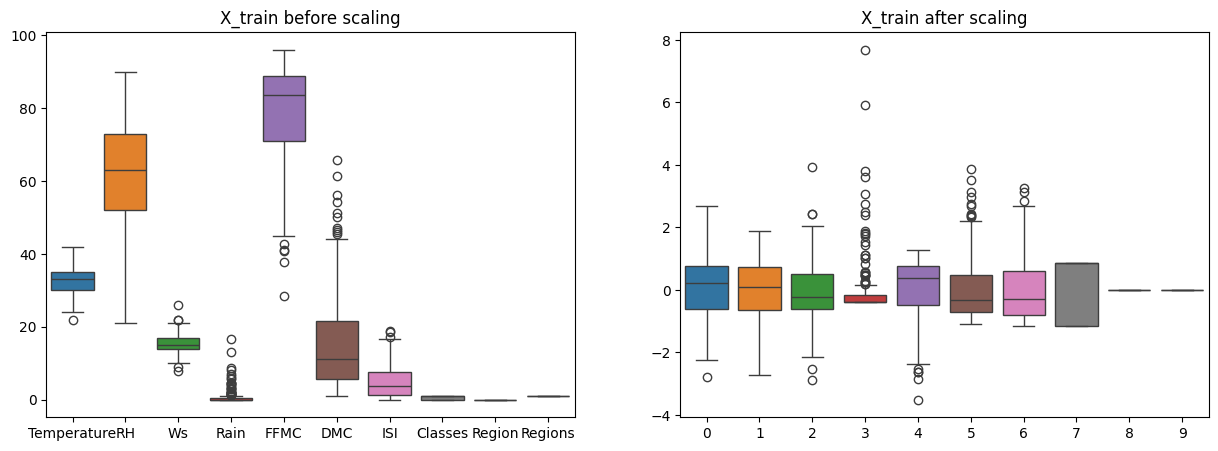

In [17]:
## BLOXPLOT to understand effect of standard scaler
plt.subplots(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.boxplot(data=X_train)
plt.title("X_train before scaling")

plt.subplot(1, 2, 2)
sns.boxplot(data=X_train_scaled)
plt.title("X_train after scaling")

MAE 2.377356327005094
R2 0.6870213235644796


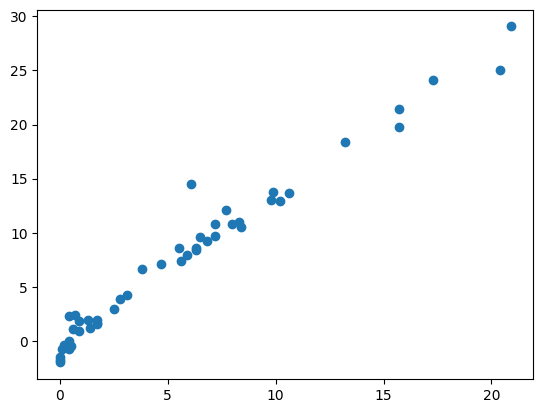

In [18]:
## Linear regression Model

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

linreg = LinearRegression()
linreg.fit(X_train_scaled, y_train)
y_pred = linreg.predict(X_test_scaled)
MAE = mean_absolute_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
print('MAE', MAE)
print('R2', score)
plt.scatter(y_test, y_pred)

In [40]:
X_train

,Temperature,RH,Ws,Rain,FFMC,DMC,ISI,Classes,Region,Regions
115,29.0,65.0,19.0,0.6,68.3,5.5,1.5,0,0,1
207,33.0,37.0,16.0,0.0,92.2,61.3,13.1,1,0,1
158,38.0,43.0,13.0,0.5,85.0,13.0,4.1,1,0,1
132,31.0,42.0,21.0,0.0,90.6,18.2,13.4,1,0,1
84,34.0,64.0,14.0,0.0,88.9,40.5,9.0,1,0,1
...,...,...,...,...,...,...,...,...,...,...
106,24.0,82.0,15.0,0.4,44.9,0.9,0.2,0,0,1
14,28.0,80.0,17.0,3.1,49.4,3.0,0.4,0,0,1
92,25.0,76.0,17.0,7.2,46.0,1.3,0.2,0,0,1
179,34.0,59.0,16.0,0.0,88.1,19.5,7.4,1,0,1


MAE 2.1296382029417473
R2 0.7949374327777154


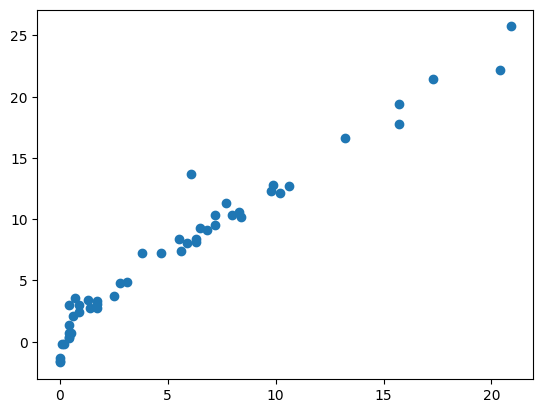

In [19]:
## Lasso Regression Model
## Linear regression Model

from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error, r2_score

lasso = Lasso()
lasso.fit(X_train_scaled, y_train)
y_pred = lasso.predict(X_test_scaled)
MAE = mean_absolute_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
print('MAE', MAE)
print('R2', score)
plt.scatter(y_test, y_pred)

In [20]:
## CROSS VALIDATION LASSO
from sklearn.linear_model import LassoCV

lassocv = LassoCV(cv=5)
lassocv.fit(X_train_scaled, y_train)

LassoCV(cv=5)

In [21]:
lassocv.alpha_

0.05413528964633573

In [22]:
lassocv.alphas_

array([7.1563667 , 6.67405153, 6.2242428 , 5.80474966, 5.41352896,
       5.04867523, 4.70841142, 4.39108025, 4.09513613, 3.81913766,
       3.56174057, 3.32169117, 3.09782031, 2.88903759, 2.69432612,
       2.51273756, 2.34338746, 2.18545099, 2.0381589 , 1.90079382,
       1.77268667, 1.65321353, 1.54179247, 1.43788081, 1.34097246,
       1.2505954 , 1.16630946, 1.08770411, 1.01439649, 0.94602956,
       0.88227033, 0.82280827, 0.76735374, 0.71563667, 0.66740515,
       0.62242428, 0.58047497, 0.5413529 , 0.50486752, 0.47084114,
       0.43910802, 0.40951361, 0.38191377, 0.35617406, 0.33216912,
       0.30978203, 0.28890376, 0.26943261, 0.25127376, 0.23433875,
       0.2185451 , 0.20381589, 0.19007938, 0.17726867, 0.16532135,
       0.15417925, 0.14378808, 0.13409725, 0.12505954, 0.11663095,
       0.10877041, 0.10143965, 0.09460296, 0.08822703, 0.08228083,
       0.07673537, 0.07156367, 0.06674052, 0.06224243, 0.0580475 ,
       0.05413529, 0.05048675, 0.04708411, 0.0439108 , 0.04095

In [23]:
lassocv.mse_path_

array([[68.58934997, 64.28650232, 49.25415197, 79.11474083, 38.68688171],
       [63.2664675 , 58.77362304, 43.20292636, 77.07183352, 34.66910628],
       [56.87389457, 51.79652473, 37.15764773, 69.4806422 , 31.16497557],
       [51.2737596 , 45.69461734, 31.98560721, 62.80993539, 27.46286399],
       [45.36816855, 40.35928545, 27.56726322, 56.94442062, 23.75447628],
       [39.875005  , 35.69250404, 23.79907917, 50.31847875, 20.54655878],
       [35.0794232 , 31.60885664, 20.59132915, 44.35263414, 17.77349727],
       [30.89154006, 28.0342798 , 17.86626498, 39.14265375, 15.37720198],
       [27.23334321, 24.90389594, 15.55674604, 34.59116894, 13.30754905],
       [24.03652419, 22.16129069, 13.60451947, 30.61376519, 11.52101422],
       [21.24273995, 19.75730052, 11.95924131, 27.13693185,  9.97950732],
       [18.80004176, 17.64896267, 10.57738151, 24.09623192,  8.65087048],
       [16.66356323, 15.79916526,  9.42117661, 21.43679316,  7.50627555],
       [14.79422393, 14.17520895,  8.4

MAE 2.427684423529974
R2 0.6905335694415884


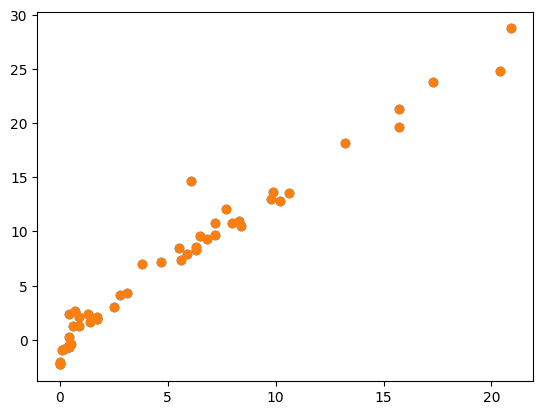

In [25]:

y_pred = lassocv.predict(X_test_scaled)
plt.scatter(y_test, y_pred)
MAE = mean_absolute_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
print('MAE', MAE)
print('R2', score)
plt.scatter(y_test, y_pred)

MAE 2.3792265336920178
R2 0.6903504752769207


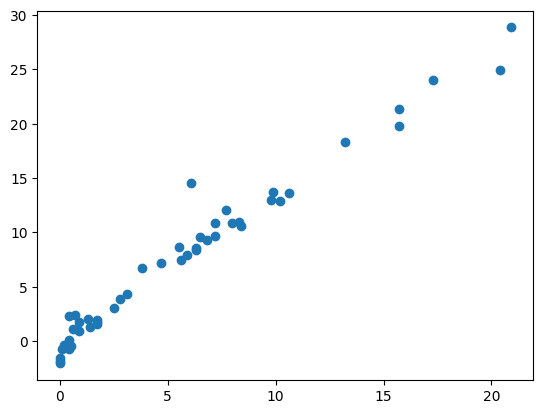

In [31]:
# RIDGE REGRESSION
## Lasso Regression Model
## Linear regression Model

from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, r2_score

ridge = Ridge()
ridge.fit(X_train_scaled, y_train)
y_pred = ridge.predict(X_test_scaled)
MAE = mean_absolute_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
print('MAE', MAE)
print('R2', score)
plt.scatter(y_test, y_pred)

MAE 2.398040907109707
R2 0.7115180853886595


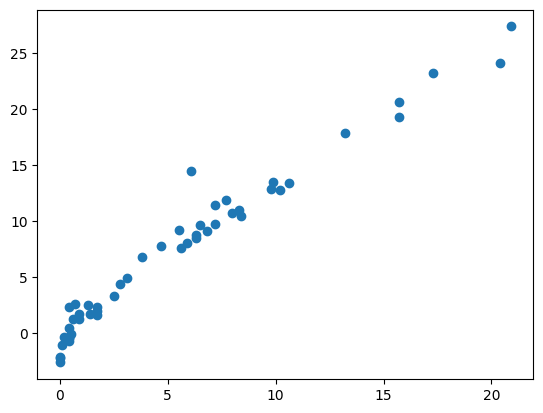

In [30]:
# RIDGE REGRESSION CV
## Lasso Regression Model
## Linear regression Model

from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_absolute_error, r2_score

ridgecv = RidgeCV(cv=5)
ridgecv.fit(X_train_scaled, y_train)
y_pred = ridgecv.predict(X_test_scaled)
MAE = mean_absolute_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
print('MAE', MAE)
print('R2', score)
plt.scatter(y_test, y_pred)

In [ ]:
## ELASTIC NET

from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_absolute_error, r2_score

ridgecv = RidgeCV(cv=5)
ridgecv.fit(X_train_scaled, y_train)
y_pred = ridgecv.predict(X_test_scaled)
MAE = mean_absolute_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
print('MAE', MAE)
print('R2', score)
plt.scatter(y_test, y_pred)

# MODEL PICKLING IN MLPROJECT


In [34]:
# Pickle the ml models, preprocessing model standard scaler

scaler

StandardScaler()

In [35]:
lasso

Lasso()

In [36]:
import pickle
pickle.dump(scaler, open('scaler.pkl', 'wb'))
pickle.dump(lasso, open('lasso.pkl', 'wb'))